<a href="https://colab.research.google.com/github/star-nox/churn_model/blob/main/churn_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras

In [ ]:
# reading data
data = pd.read_csv("Churn_Modelling.csv")

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# checking for null values in the dataframe
data.isnull().values.any()

False

Text(0, 0.5, 'Frequency')

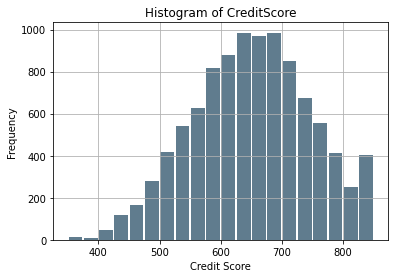

In [ ]:
data['CreditScore'].plot.hist(grid=True, bins=20, rwidth=0.9, color='#607c8e')
plt.title('Histogram of CreditScore')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

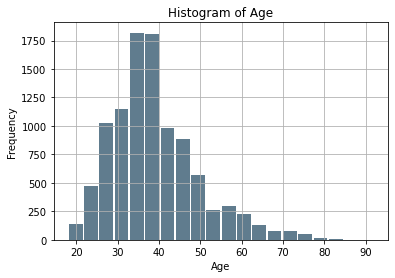

In [ ]:
data['Age'].plot.hist(grid=True, bins=20, rwidth=0.9, color='#607c8e')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

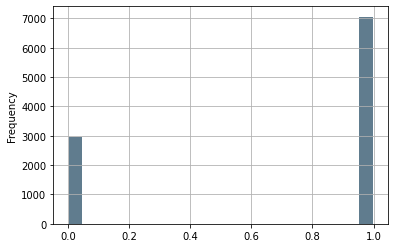

In [ ]:
data['HasCrCard'].plot.hist(grid=True, bins=20, rwidth=0.9, color='#607c8e')

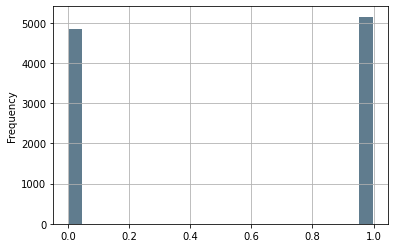

In [ ]:
data['IsActiveMember'].plot.hist(grid=True, bins=20, rwidth=0.9, color='#607c8e')

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# converting string variables to numerical

labelencoder = LabelEncoder()
data['geography_num'] = labelencoder.fit_transform(data['Geography'])
data['gender_num'] = labelencoder.fit_transform(data['Gender'])

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,geography_num,gender_num
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,2,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,2,0


In [ ]:
# dropping string variables and irrelevant variables

del data['Geography']
del data['Gender']
del data['Surname']

In [ ]:
data.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,geography_num,gender_num
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1,0,0
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0,2,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1,0,0
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0,2,0
